In [71]:
import pandas as pd 
import geopandas as gpd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [152]:
data = gpd.read_file('полевые данные общая/profiles/profile_points.geojson')
data.AB = data.AB.astype('float')
data = data.drop('type', axis = 1)
data = data.dropna(axis = 0)

longitudinal = data[~data["name"].isin(["528", "444", "445", '446', '586'])].reset_index()
transverse = data[data["name"].isin(["528", "444", "445", '446', '586','527'])].reset_index()

# D:\python_projects\field_data\полевые данные общая\profiles\profile_points.geojson

<AxesSubplot:>

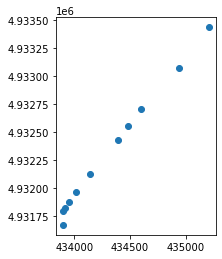

In [153]:
longitudinal.plot()

<AxesSubplot:>

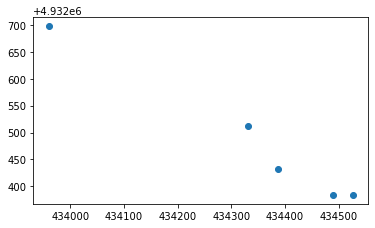

In [154]:
transverse.plot()

In [155]:
g = longitudinal[longitudinal.name == '585']

In [156]:
longitudinal['distance'] = longitudinal.geometry.distance(g.loc[g.index.repeat(18)].reset_index())

c:\Users\ermolaevNR\.conda\envs\GIS3.6\lib\site-packages\geopandas\base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [157]:
longitudinal = longitudinal.sort_values(by = 'distance', axis = 0)

<AxesSubplot:xlabel='distance'>

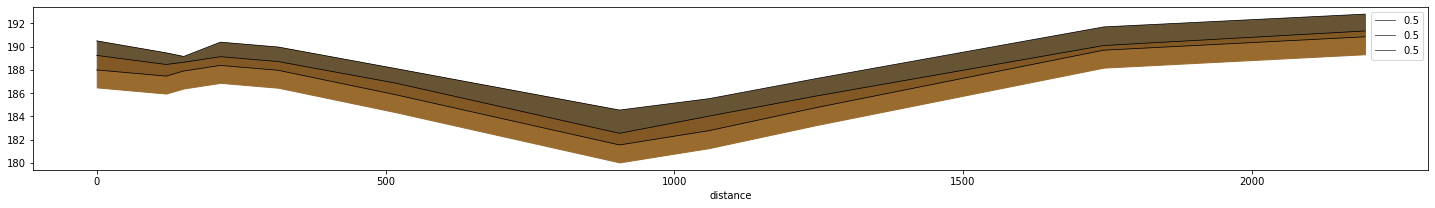

In [178]:
longitudinal
fig, ax = plt.subplots(figsize = (25,3))


ax.fill_between(
    x =longitudinal['distance'],
    y1 = gaussian_filter1d(longitudinal["real_elev"], sigma = 0.1),
    y2 =  gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.A * 0.01) * 5 ),sigma = 0.1), 
    color= "#675434", 
)

ax.fill_between(
    x =longitudinal['distance'],
    y1 = gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.A * 0.01) * 5 ),sigma = 0.1),
    y2 =  gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.AB * 0.01) * 5 ),sigma = 0.1), 
    color= "#825925", 
)

ax.fill_between(
    x =longitudinal['distance'],
    y1 = gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.AB * 0.01) * 5 ),sigma = 0.1),
    y2 =  gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.AB * 0.01) * 5 ),sigma = 0.1) - 1.5, 
    color= "#996B2F", 
)



sns.lineplot( x =longitudinal['distance']  , y = gaussian_filter1d(longitudinal["real_elev"], sigma = 0.1), ax = ax, color = 'black', size = 0.5)
sns.lineplot( x =longitudinal['distance']  , y = gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.A * 0.01) * 5 ), sigma = 0.1), ax = ax, color = 'black', size = 0.5)
sns.lineplot( x =longitudinal['distance']  , y = gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.AB * 0.01) * 5 ), sigma = 0.1), ax = ax, color = 'black', size = 0.5)


In [173]:
gaussian_filter1d((longitudinal["real_elev"] - (longitudinal.AB * 0.01) * 5 ), sigma = 0.01) - 1

array([187.  , 186.47, 186.91, 187.39, 186.97, 184.87, 180.55, 181.78,
       183.75, 188.7 , 189.85])